Zero dimensional global energy balance model including ice albedo feedback

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

plt.style.use('seaborn-dark')

In [2]:
def energy_balance(T):
    a = albedo_T(T)
    incoming = incoming_radiation(T, a)
    outgoing = outgoing_radiantion(T)
    incom_outgo = incoming - outgoing
    return incom_outgo


In [3]:
def incoming_radiation(T, a):
    return s0 *(1 - a)

In [4]:
# Outgoing long wave radiation
def outgoing_radiantion(T):
    return (1- e/2) * sigma * T ** 4

In [5]:
def albedo_T(T):
    if T > T_max:
        return a_min
    elif T < T_min:
        return a_max
    else:
        return a_max - (a_max - a_min)*(T - T_min)/(T_max - T_min)

In [6]:
# Emissivity
e = 0.77

# Stefan-Boltzmann constant
sigma = 5.67e-8; # J/(sec m^2 K^4)

# Min-Max albedo
a_min = 0.3
a_max = 0.7
T_min = 245
T_max = 275

# Solar constant
s0 = 1367 * 0.25 # W/m^2

In [7]:
# Inizialize temperatures
temp_np = np.arange(220, 300, 0.1)
n = len(temp_np)

albedo_np = np.zeros((n, ))
incom_np = np.zeros((n, ))
outgo_np = np.zeros((n, ))

for i, T in enumerate(temp_np):
    a = albedo_T(T) # Albedo
    incom_np[i] = incoming_radiation(T, a); # Incoming radiation
    outgo_np[i] = outgoing_radiantion(T); # Outgoing radiation
    albedo_np[i] = a

# Energy balance
incom_outgo = incom_np - outgo_np

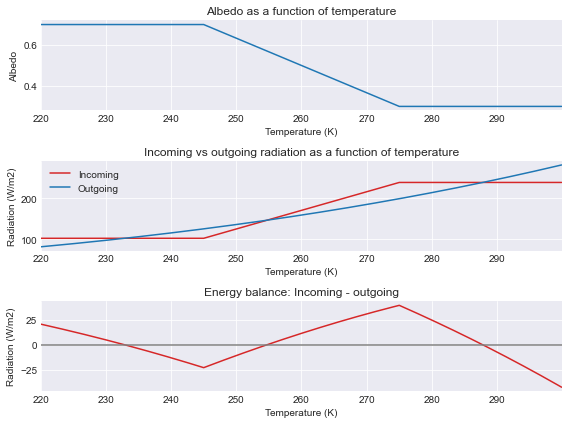

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (8, 6))

# Albedo as a function of temperature
ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Albedo")
ax1.set_title("Albedo as a function of temperature")
ax1.set_xlim(temp_np.min(), temp_np.max())
ax1.grid()
ax1.plot(temp_np, albedo_np, c='tab:blue')

# Incoming vs outgoing radiation as a function of temperature
ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel("Radiation (W/m2)")
ax2.set_title("Incoming vs outgoing radiation as a function of temperature")
ax2.set_xlim(temp_np.min(), temp_np.max())
ax2.grid()
ax2.plot(temp_np, incom_np, c='tab:red')
ax2.plot(temp_np, outgo_np, c='tab:blue')
ax2.legend(("Incoming", "Outgoing"))

# Energy balance: Incoming - outgoing
ax3.set_xlabel("Temperature (K)")
ax3.set_ylabel("Radiation (W/m2)")
ax3.set_title("Energy balance: Incoming - outgoing")
ax3.set_xlim(temp_np.min(), temp_np.max())
ax3.grid()
ax3.plot(temp_np, incom_outgo, c='tab:red')
ax3.axhline(y=0, color='grey')
plt.tight_layout()
plt.show()

In [9]:
""" Three different possible equilibrium temperatures in this model
Find the solutions using Brent's method or Newton-Raphson (Incoming=Outgoing) """

# Stable solution - Snowball Earth
s1 = brentq(energy_balance, 220, 250, full_output=True)

# Unstable equilibrium
s2 = brentq(energy_balance, 250, 260, full_output=True)

# Stable solution - Warm climate
s3 = brentq(energy_balance, 260, 300, full_output=True)

In [10]:
print(f"Solutions: {round(s1[0]), round(s2[0]), round(s3[0])}")

Solutions: (233, 255, 288)


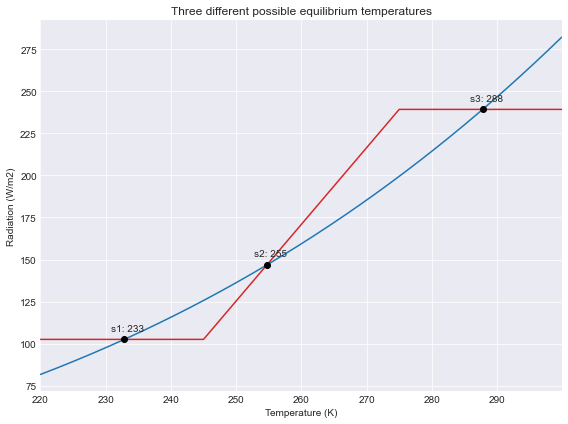

In [11]:
# Plot the three solutions

solution_x = np.array([s1[0], s2[0], s3[0]])
solution_y = np.array([incoming_radiation(T, albedo_T(T)) for T in solution_x])

fig, ax = plt.subplots(figsize = (8, 6))

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Radiation (W/m2)")
ax.set_title("Three different possible equilibrium temperatures")
ax.set_xlim(temp_np.min(), temp_np.max())
ax.scatter(solution_x, solution_y, c='k', zorder=5)
ax.plot(temp_np, incom_np, c='tab:red')
ax.plot(temp_np, outgo_np, c='tab:blue')

ax.annotate(f"s1: {round(solution_x[0])}", (solution_x[0]-2, solution_y[0]+5))
ax.annotate(f"s2: {round(solution_x[1])}", (solution_x[1]-2, solution_y[1]+5))
ax.annotate(f"s3: {round(solution_x[2])}", (solution_x[2]-2, solution_y[2]+5))

ax.grid()
plt.tight_layout()
plt.show()